In [2]:
import warnings 
warnings.filterwarnings('ignore')


In [3]:
# Required Dependencies
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
#from matplotlib import pyplot as plt
#import numpy as np
#import scipy.stats as stats
#import pandas as pd
#import seaborn as sns
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, r2_score

In [5]:
#data= pd.read_csv('C:\\bootcamp\\Project-1-Data-Analytics-Boot-Camp\\project 1.csv')
#df =pd.DataFrame(data)

In [6]:
data = [
['Amsterdam',4500],
['Sydney',4614],
['Vienna',3500],
['Stockholm',3804],
['Copenhagen',5851],
['Helsinki',4000],
['Fukuoka',2709],
['Berlin',3500],
['Barcelona',2800],
['Vancouver',4003],
['Melbourne',4285],
['Beijing',1672],
['Bangkok',850],
['Buenos Aires',267], 
['Toronto',4003],
['Madrid',2800],
['Jakarta',500],
['Seoul',3247],
['Frankfurt',4500],
['Geneva',11534],
['Tel Aviv',4766],
['Istanbul',745],
['Cairo',142],
['Taipei',1850],
['Los Angeles',5500],
['Mumbai',595],
['Boston',6000],
['Dublin',4500],
['Tokyo',338],
['Chicago',5000],
['Hong Kong',4491],
['Shanghai',1694],
['Brussels',2463],
['San Francisco',9256],
['Paris',4600],
['Sao Paulo',1802],
['Zurich',11534],
['London',5099],
['Johannesburg',1634],
['Milan',2800],
['Washington, D.C',9000],
['New York',4833],
['Moscow',990],
['Mexico City',768],
]
# Change Cities to City
df= pd.DataFrame(data, columns=['City','Average monthly income'])

In [7]:
print(df)

               City  Average monthly income
0         Amsterdam                    4500
1            Sydney                    4614
2            Vienna                    3500
3         Stockholm                    3804
4        Copenhagen                    5851
5          Helsinki                    4000
6           Fukuoka                    2709
7            Berlin                    3500
8         Barcelona                    2800
9         Vancouver                    4003
10        Melbourne                    4285
11          Beijing                    1672
12          Bangkok                     850
13     Buenos Aires                     267
14          Toronto                    4003
15           Madrid                    2800
16          Jakarta                     500
17            Seoul                    3247
18        Frankfurt                    4500
19           Geneva                   11534
20         Tel Aviv                    4766
21         Istanbul             

In [8]:
#df['Cities'] = df['Average monthly income'].replace(r'[\$,£]', '', regex=True).astype(float)

In [9]:
# Print the average income in acsending order 
#df_sorted = df.sort_values(by='Col 2', ascending=True)


In [10]:
#print(df.columns)


In [11]:
#df.columns = df.columns.str.strip()


In [12]:
#df.rename(columns={'Average monthly income': 'Average monthly income'}, inplace=True)
#df_sorted = df.sort_values(by='Average monthly income', ascending=True)


In [13]:
# Print the first few rows 
#print(data.head())

In [16]:
# Statistical analysis
#change data to df
print(df.describe())

       Average monthly income
count               44.000000
mean              3712.250000
std               2722.939324
min                142.000000
25%               1688.500000
50%               3652.000000
75%               4652.000000
max              11534.000000


In [17]:
#KASSIDY CELL
#Must put kaggle file in the folder and then read in the file
city_df = pd.read_csv("healthy_lifestyle_city_2021.csv")

#Shriyas Function for classifying training preferences
def classify_training_preferences(row):
    outdoor_activities=row['Outdoor activities(City)']
    if outdoor_activities> city_df['Outdoor activities(City)'].median():
        return 'Outdoor/Marathon'
    elif outdoor_activities < city_df['Outdoor activities(City)'].median()/2:
        return 'Home Workouts'
    else:
        return 'Gym Workouts'
#create a new column in the city_df
city_df["Training Preferences"] = city_df.apply(classify_training_preferences, axis=1)

In [18]:
#merge both city_df and df together using the City index
merged_df = pd.merge(df, city_df, on = "City")

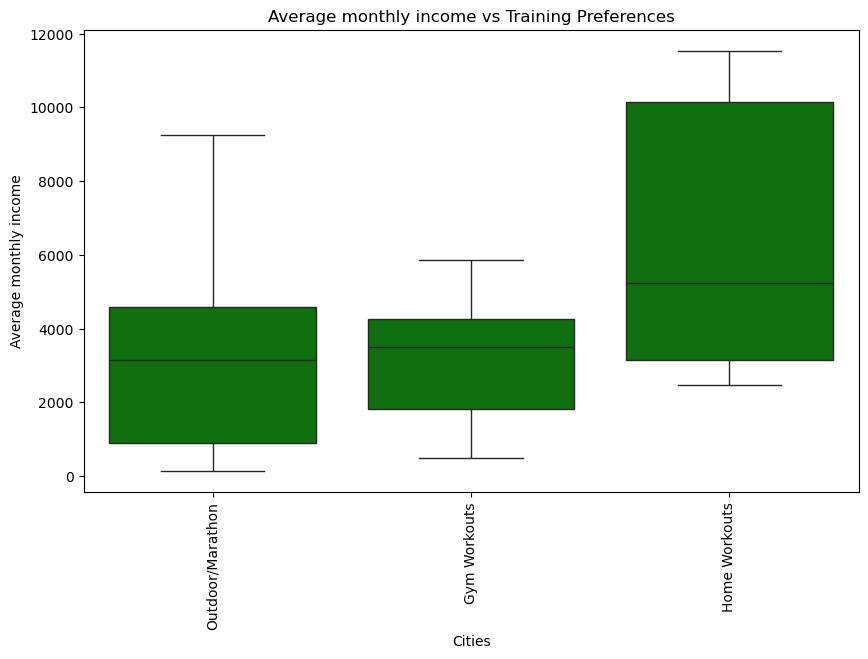

In [20]:
# Visualize of average income across 44 cities
plt.figure(figsize=(10, 6))
#change it to sns.boxplot with training preferences and income level
sns.boxplot(x = "Training Preferences", y = "Average monthly income", data = merged_df, color = "green")
plt.title("Average monthly income vs Training Preferences")
plt.xlabel("Cities")
plt.ylabel("Average monthly income")
plt.xticks(rotation = 90) 
plt.show()

In [ ]:
#plt.figure(figsize=(12, 8))
#avg_cost = merged_df.groupby('Training Preferences')['Number of Gyms'].mean().reset_index()
#sns.barplot(x='Training Preferences', y='Number of Gyms', data=avg_cost)
#plt.title('Average Number of Gyms by Training Preferences')
#plt.xlabel('Training Preferences')
#plt.ylabel('Average Number of Gyms')
#plt.show()


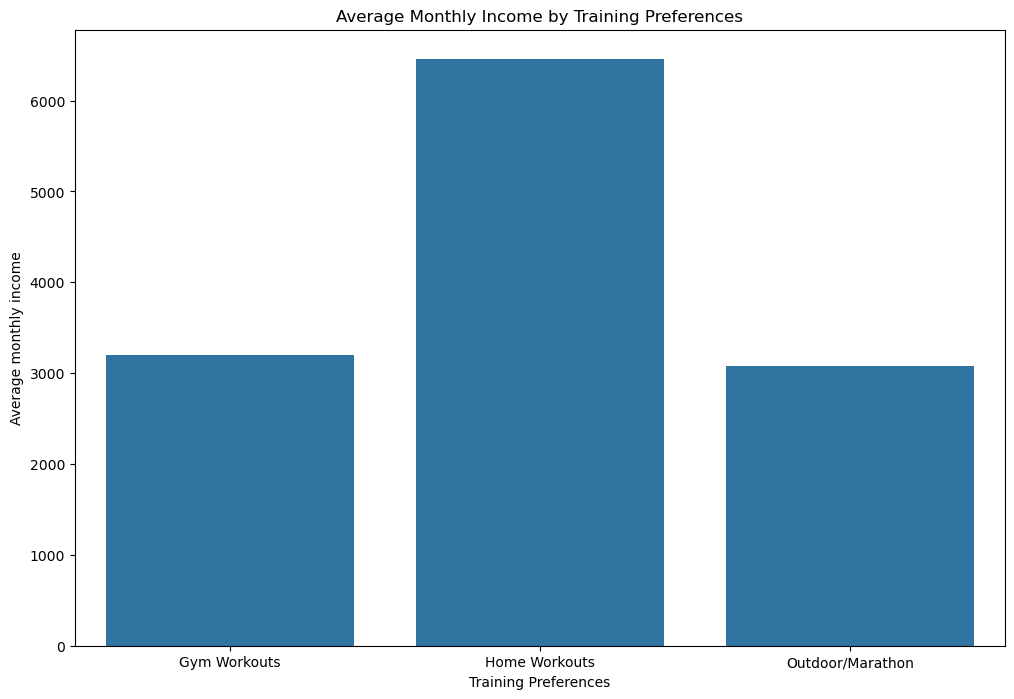

In [21]:
#Kassidy Cell for bar graph
plt.figure(figsize=(12,8))
average_income = merged_df.groupby("Training Preferences")["Average monthly income"].mean().reset_index()
sns.barplot(x = "Training Preferences", y = "Average monthly income", data = average_income)
plt.title("Average Monthly Income by Training Preferences")
plt.xlabel("Training Preferences")
plt.ylabel("Average monthly income")
plt.show()

In [22]:
#Kassidy Cell to add ANOVA table results
outdoor = merged_df[merged_df['Training Preferences']== 'Outdoor/Marathon']['Average monthly income']
gym = merged_df[merged_df['Training Preferences']== 'Gym Workouts']['Average monthly income']
home = merged_df[merged_df['Training Preferences']== 'Home Workouts']['Average monthly income']
stats.f_oneway(outdoor, gym, home)

F_onewayResult(statistic=4.936895185551177, pvalue=0.012126970355433688)